In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 데이터 양상 확인
df = pd.read_csv('uci-secom.csv')
print('************************************Raw data************************************')
print(df)
print('***********************************Data info***********************************')
print(df.info())

************************************Raw data************************************
                     Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.597

상관 방법에 의한 상위 40위 특징은 103,59,348,431,430,435,21,436,129,210,510,124,124,295,160,299,121,294,247,159,130,437,200,460,95,475,47,47,19,58,183,126,126,193,193,193이다.그래프 간의 산란 그래프에 의한 산란 관계를 보여주는 산란 그림이다.

c:\Users\sumin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


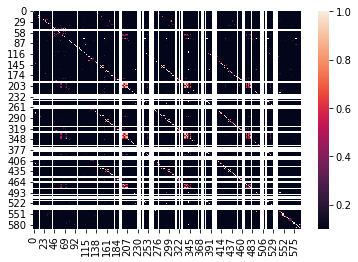

In [45]:
import matplotlib.pyplot as plt
import seaborn as sn
corrMatrix = df.corr()
sn.heatmap(corrMatrix,0.1)
plt.show()


In [43]:
corrMatrix

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,...,-0.028380,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177,-0.025144
1,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,...,0.083463,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834,-0.002615
2,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,...,-0.010759,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226,-0.000957
3,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,...,-0.096619,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157,-0.024631
4,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,...,0.088327,0.045361,-0.001301,-0.001598,-0.001617,-0.044016,-0.031145,-0.026204,0.051428,-0.013760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018472,-0.009417,-0.025548,0.034779,-0.044016,NaN,-0.041296,0.058171,0.010436,0.033759,...,-0.475397,-0.016726,0.002257,0.001606,0.002744,1.000000,0.167913,0.164238,-0.486559,0.004157
587,-0.025909,0.017290,-0.029479,-0.039309,-0.031145,NaN,0.034184,-0.021472,0.022853,0.059341,...,0.396369,-0.024481,-0.002650,-0.002498,-0.002931,0.167913,1.000000,0.974276,0.390813,0.035392
588,-0.028196,0.010134,-0.030943,-0.033780,-0.026204,NaN,0.032359,-0.020962,0.026261,0.060803,...,0.379167,-0.020712,-0.002261,-0.001957,-0.002531,0.164238,0.974276,1.000000,0.389211,0.031168
589,0.004177,0.044834,-0.033226,-0.081157,0.051428,NaN,0.044227,-0.107875,-0.022776,0.004882,...,1.000000,0.041494,-0.003008,-0.003295,-0.003801,-0.486559,0.390813,0.389211,1.000000,-0.002654


In [29]:
corr_matrix = df.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,...,-0.028380,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177,-0.025144
1,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,...,0.083463,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834,-0.002615
2,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,...,-0.010759,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226,-0.000957
3,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,...,-0.096619,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157,-0.024631
4,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,...,0.088327,0.045361,-0.001301,-0.001598,-0.001617,-0.044016,-0.031145,-0.026204,0.051428,-0.013760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.018472,-0.009417,-0.025548,0.034779,-0.044016,NaN,-0.041296,0.058171,0.010436,0.033759,...,-0.475397,-0.016726,0.002257,0.001606,0.002744,1.000000,0.167913,0.164238,-0.486559,0.004157
587,-0.025909,0.017290,-0.029479,-0.039309,-0.031145,NaN,0.034184,-0.021472,0.022853,0.059341,...,0.396369,-0.024481,-0.002650,-0.002498,-0.002931,0.167913,1.000000,0.974276,0.390813,0.035392
588,-0.028196,0.010134,-0.030943,-0.033780,-0.026204,NaN,0.032359,-0.020962,0.026261,0.060803,...,0.379167,-0.020712,-0.002261,-0.001957,-0.002531,0.164238,0.974276,1.000000,0.389211,0.031168
589,0.004177,0.044834,-0.033226,-0.081157,0.051428,NaN,0.044227,-0.107875,-0.022776,0.004882,...,1.000000,0.041494,-0.003008,-0.003295,-0.003801,-0.486559,0.390813,0.389211,1.000000,-0.002654


In [59]:
range(len(df.columns))
list(df.columns.values)

['Time',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137

<Figure size 432x288 with 0 Axes>

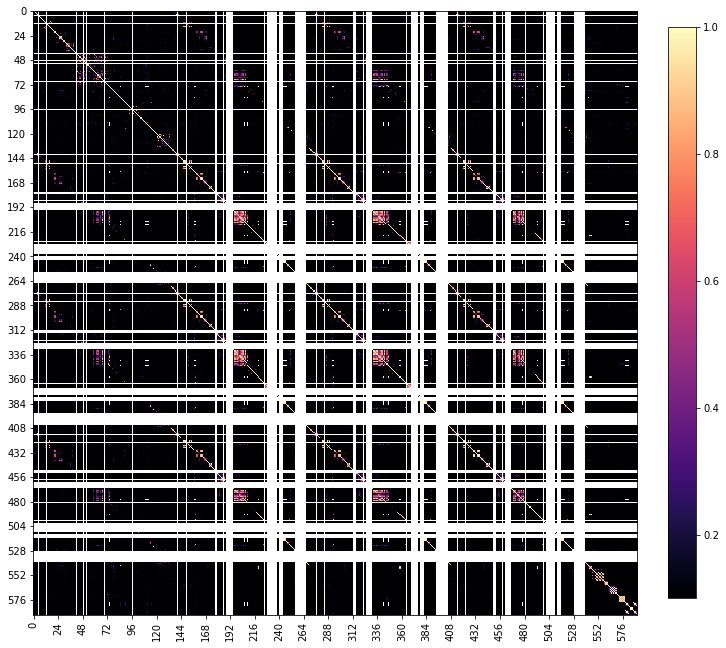

In [70]:
# 상위 40위 안에 드는 특징 찾기 상관관계
corr_matrix = df.corr()
list_df = list(df.columns.values)
fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
plt.imshow(corr_matrix, cmap='magma', interpolation = 'nearest')
plt.xticks(range(0, len(list_df), 24), rotation='vertical')
plt.yticks(range(0, len(list_df), 24))
plt.colorbar(shrink=0.8)
plt.clim(0.1)
plt.show()

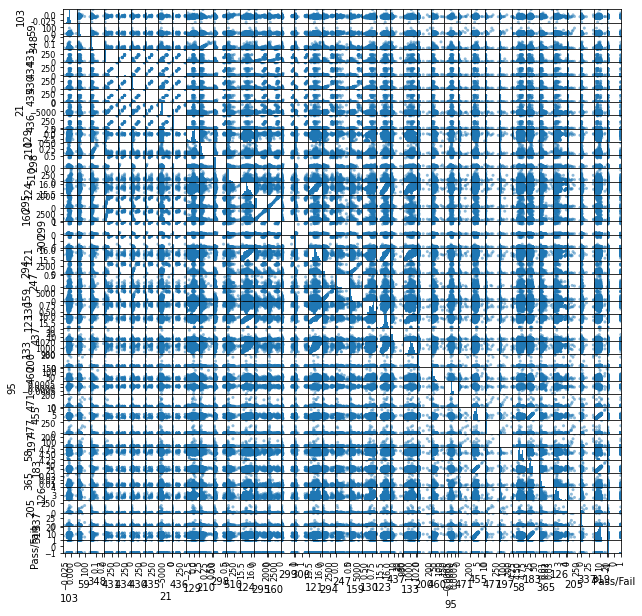

In [73]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df2 = pd.DataFrame(df)[['103','59','348','431','434','430','435','21','436','129','210','298','510','124','295','160',
'299','300','121','294','247','159','130','123','437','133','200','460','95','471','455','477','197','58','183','365',
'126','205','337','319','Pass/Fail']]

pd.plotting.scatter_matrix(df2, alpha=0.5, figsize=(10,10))

plt.show()

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import time
import warnings
warnings.filterwarnings('ignore')
start= time.time()
df = df.replace(np.NaN,0)
x = df[['103','21','59','129','210','298','348','430','431','434',
          '435','436','510','124','160','295','121','247','294','299','300',
          '123','130','159','437','133','200','460','471','95','58','183','197','455',
          '477','126','365','205','319','337']]
y = df['Pass/Fail']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=30)
print('**********************data tain and test**********************')
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

Lr = LogisticRegression(C=1e20)
Lr.fit(x_train,y_train)


ypred_knn = knn.predict(x_test)
ypred_Lr = Lr.predict(x_test)

print('**********************Acuracy**********************')
print('Accuracy KNeighborsClassifier = ',metrics.accuracy_score(y_test,ypred_knn))
print('Accuracy LogisticRegression = ',metrics.accuracy_score(y_test,ypred_Lr))


finish=time.time()
processtime=finish-start
print('Process time =',processtime)

**********************data tain and test**********************
shape of x_train:  (1537, 40)
shape of x_test:  (30, 40)
shape of y_train:  (1537,)
shape of y_test:  (30,)
**********************Acuracy**********************
Accuracy KNeighborsClassifier =  0.8666666666666667
Accuracy LogisticRegression =  0.9333333333333333
Process time = 0.09695720672607422


In [75]:
df = pd.read_csv('uci-secom.csv')
df.shape

(1567, 592)

In [76]:
df.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

-1    1463
 1     104
Name: Pass/Fail, dtype: int64


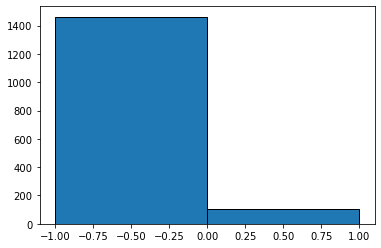

In [94]:
y_data = df['Pass/Fail']
y_data
plt.hist(y_data, bins=2, edgecolor='black')

print(y_data.value_counts())

In [98]:
x_data = df.drop(columns=['Pass/Fail','Time'], axis = 1) 
x_data.head().T

,0,1,2,3,4
0,3030.9300,3095.7800,2932.6100,2988.7200,3032.2400
1,2564.0000,2465.1400,2559.9400,2479.9000,2502.8700
2,2187.7333,2230.4222,2186.4111,2199.0333,2233.3667
3,1411.1265,1463.6606,1698.0172,909.7926,1326.5200
4,1.3602,0.8294,1.5102,1.3204,1.5334
...,...,...,...,...,...
585,2.3630,4.4447,3.1745,2.0544,99.3032
586,NaN,0.0096,0.0584,0.0202,0.0202
587,NaN,0.0201,0.0484,0.0149,0.0149
588,NaN,0.0060,0.0148,0.0044,0.0044


<Figure size 432x288 with 0 Axes>

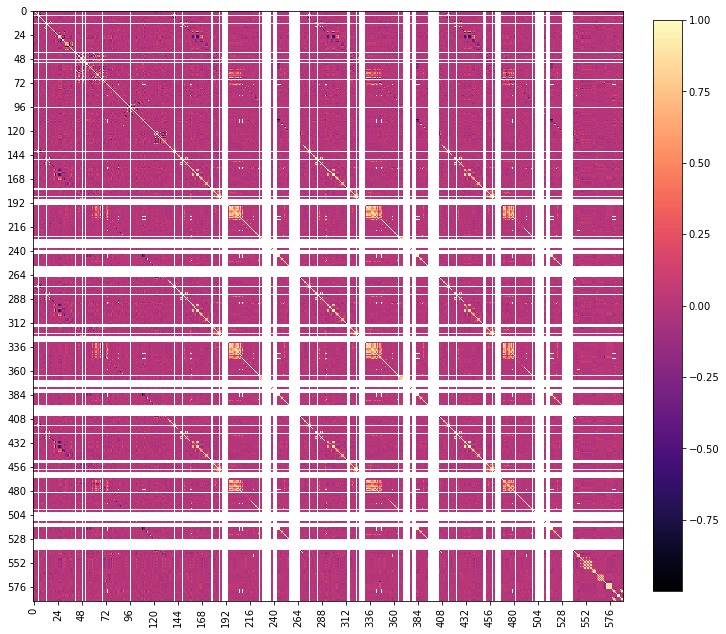

In [102]:
# 상위 40위 안에 드는 특징 찾기 상관관계
corr_matrix = x_data.corr()
list_df = list(x_data.columns.values)
fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
plt.imshow(corr_matrix, cmap='magma', interpolation = 'nearest')
plt.xticks(range(0, len(list_df), 24), rotation='vertical')
plt.yticks(range(0, len(list_df), 24))
plt.colorbar(shrink=0.8)
# plt.clim(0.1)
plt.show()

In [104]:
x_data.isnull().sum().sort_values(ascending=False)

157    1429
292    1429
293    1429
158    1429
492    1341
       ... 
251       0
252       0
254       0
255       0
387       0
Length: 590, dtype: int64

In [106]:
x_data.fillna(value=0, inplace=True)
x_data.isnull().sum()
x_data.shape

(1567, 590)

In [107]:
uni_list =[]
for column in x_data.columns:
  if (x_data[column].nunique() == 1):
    uni_list.append(column)
x_data.drop(columns=uni_list, axis =1, inplace=True)

In [ ]:
x_column = x_data.columns

In [109]:
import xgboost as xgb
import matplotlib.pyplot as plt

# # 모델 선언
# model = xgb.XGBClassifier() 

# # 모델 훈련
# model.fit(x,y) 

# # 모델 예측
# y_pred = model.predict(X_test)

In [112]:
import pandas as pd
import numpy as np
# import plotly_express as px
import plotly.graph_objects as go
import ipywidgets as widgets

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'plotly_express'

In [110]:
data = pd.read_csv("uci-secom.csv" , sep=',')
data.head(10)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,-1
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,-1
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,-1
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,-1


In [113]:
data.isna().sum()

data.drop_duplicates().shape
data.drop_duplicates(inplace=True)
data.loc[:,data.isna().sum() > 1000]
data.drop(columns=data.loc[:,data.isna().sum() > 1000].columns , inplace=True)
data.shape


(1567, 572)

In [114]:
data['Pass/Fail'].value_counts()
data['Pass/Fail'].value_counts(normalize=True)
data['Pass/Fail'] = data['Pass/Fail'].replace(-1,0).astype('int64')
data['Pass/Fail'].value_counts()

0    1463
1     104
Name: Pass/Fail, dtype: int64

In [115]:
passdata = data.query("`Pass/Fail` == 1").set_index('Time')
passdata.head(3)


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
Time,,,,,,,,,,,,,,,,,,,,,
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
2008-07-19 21:57:00,2994.05,2548.21,2195.1222,1046.1468,1.3204,100.0,103.3400,0.1223,1.5144,-0.0190,...,57.8122,0.4925,0.0158,0.0041,3.2115,0.0355,0.0205,0.0071,57.8122,1
2008-07-19 22:52:00,2928.84,2479.40,2196.2111,1605.7578,0.9959,100.0,97.9156,0.1257,1.4690,0.0170,...,75.5077,0.4987,0.0427,0.0092,8.5646,0.0370,0.0279,0.0081,75.5077,1


In [116]:
faildata = data.query("`Pass/Fail` == 0").set_index('Time')
faildata.head(3)

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
Time,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0


In [119]:
data.corr().mean().mean()
data.set_index('Time' , inplace=True)
data.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
Time,,,,,,,,,,,,,,,,,,,,,
2008-08-30 05:38:00,3023.07,2484.55,2242.8555,1430.7270,0.8832,100.0,106.2100,0.1216,1.5613,-0.0028,...,NaN,0.4979,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057,0
2008-09-19 19:29:00,3000.38,2593.09,2191.1333,2197.6570,1.1569,100.0,89.7222,0.1251,1.5947,0.0143,...,NaN,0.4994,0.0147,0.0040,2.9498,0.0280,0.0078,0.0022,27.7601,0
2008-06-10 12:42:00,2981.72,2580.44,2207.9555,1283.4368,1.8467,100.0,95.4022,0.1216,1.4458,-0.0108,...,NaN,0.5025,0.0110,0.0033,2.1794,0.0077,0.0149,0.0041,193.4633,0


In [120]:
plt.scatter(data.drop(columns='Pass/Fail').mean() , log_y=True)

TypeError: scatter() missing 1 required positional argument: 'y'

In [121]:
#import EDA tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#import modeling tools
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef

In [122]:
#load dataset
df = pd.read_csv("uci-secom.csv", parse_dates=["Time"])
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [123]:
missing=df.isna().sum()
missing

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

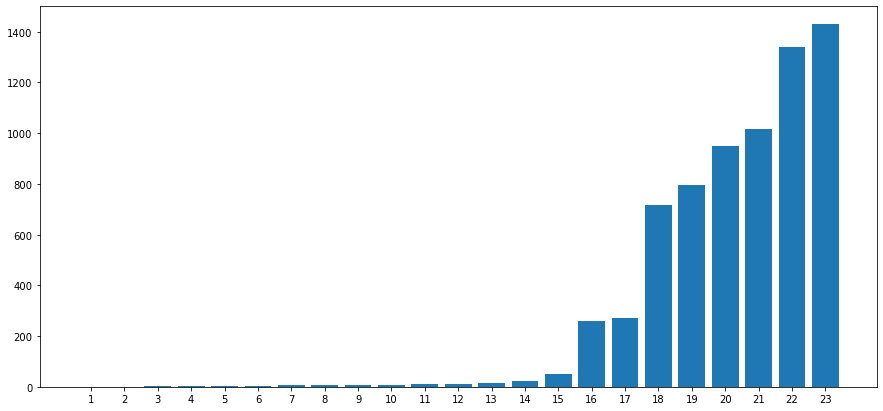

In [124]:
#visualize the unique missing values
fig = plt.subplots(figsize=(15,7))

plt.bar(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1),
       missing.sort_values(ascending=True).unique())
plt.xticks(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1));

In [125]:
#Let's handle missing values with mean
df1=df.drop("Time", axis=1)
for label,content in df1.items():
    df1[label]=content.fillna(content.mean())

In [126]:
#Now let's convert Time to separate columns of Year, Month, Day, Day of year and Day of week .
#this step is important because the time data cannot be preprocessed in first format.
df1["Year"]= df.Time.dt.year
df1["Month"]= df.Time.dt.month
df1["Day"]= df.Time.dt.day
df1["DayOfWeek"]= df.Time.dt.dayofweek
df1["DayOfYear"]= df.Time.dt.dayofyear

In [127]:
#Find the features with one value
features_with_one_value=[]
for label,content in df1.items():
    if df1[label].nunique()==1:
        features_with_one_value.append(label)
    
print(features_with_one_value, len(features_with_one_value))
        

['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538', 'Year'] 117


In [129]:
#drop features with one value  
for label,content in df1.items():
    if df1[label].nunique()==1:
        df1.drop(label, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: datetime64[ns](1), float64(590), int64(1)
memory usage: 7.1 MB


In [131]:
#Split data into X,y
X = df1.drop("Pass/Fail", axis=1)
y = df1["Pass/Fail"]

#Using mutual information classif to select important features
importances = mutual_info_classif(X, y)
f_importances = pd.Series(importances, df1.columns[0:len(df1.columns)-1])
df_importances = pd.DataFrame(f_importances.sort_values()[::-1], columns=["MI_Score"])
df_importances

,MI_Score
541,0.028455
41,0.027755
477,0.026743
577,0.024929
570,0.024312
...,...
201,0.000000
200,0.000000
199,0.000000
198,0.000000


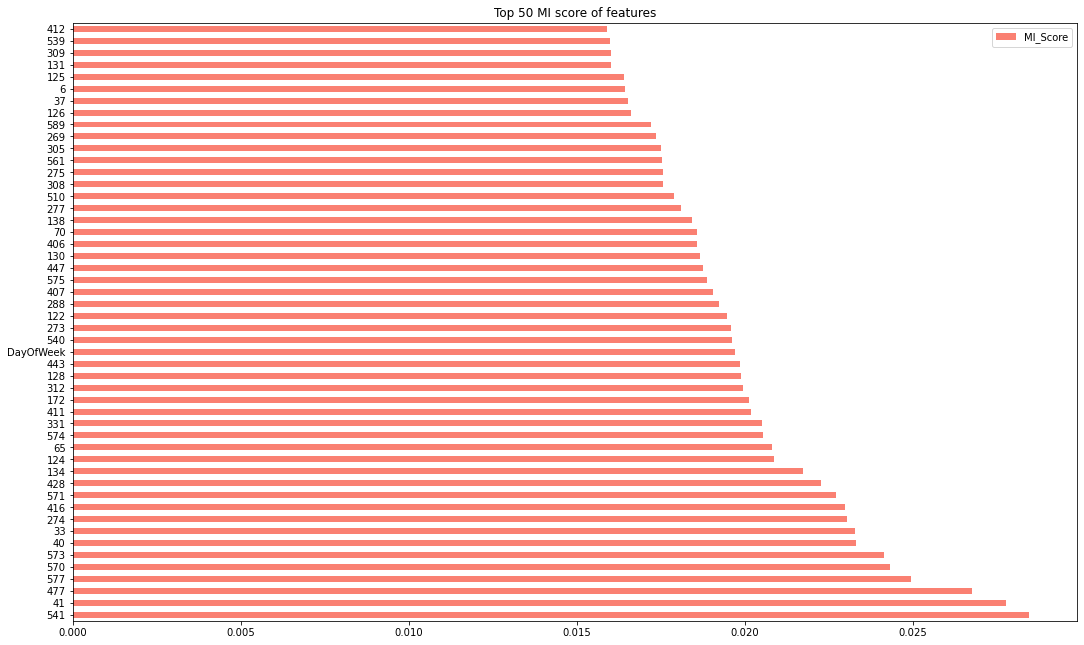

In [132]:
#visualize top 50 MI Score
df_importances[:50].plot(kind="barh", color="salmon", figsize=(18,11), title=("Top 50 MI score of features"));

In [133]:
#Let's drop features with MI score = 0
drop_list = df_importances.index[df_importances['MI_Score'] == 0].tolist()
f_importances.drop(drop_list, inplace=True)

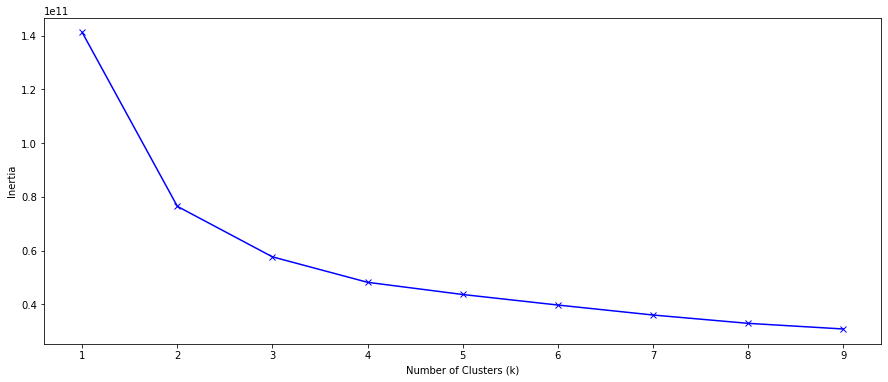

In [134]:
#Using Elbow Method to determine suitable number of clusters
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [135]:
# Create cluster feature
kmeans = KMeans(n_clusters=2)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,0,1,2,3,4,6,7,8,9,10,...,585,586,587,588,589,Month,Day,DayOfWeek,DayOfYear,Cluster
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,2.3630,0.021458,0.016475,0.005283,99.670066,7,19,5,201,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,4.4447,0.009600,0.020100,0.006000,208.204500,7,19,5,201,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,3.1745,0.058400,0.048400,0.014800,82.860200,7,19,5,201,0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,2.0544,0.020200,0.014900,0.004400,73.843200,7,19,5,201,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,99.3032,0.020200,0.014900,0.004400,73.843200,7,19,5,201,0


In [141]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [142]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# uci-secom.csv has 1568 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('uci-secom.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'uci-secom.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 592 columns


In [144]:
plt.plotPerColumnDistribution(df1, 10, 5)

AttributeError: module 'matplotlib.pyplot' has no attribute 'plotPerColumnDistribution'